<a href="https://colab.research.google.com/github/tnwls6865/Creative_Masters/blob/main/week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creative Masters


### Chat GPT
https://openai.com/blog/chatgpt

#### 간단한 계산기

In [1]:
# 함수 정의
def add(x, y):
    return x + y

def subtract(x, y):
    return x - y

def multiply(x, y):
    return x * y

def divide(x, y):
    return x / y

# 사용자 입력 받기
print("사칙연산 계산기입니다.")
print("사용 가능한 연산: +, -, *, /")
num1 = float(input("첫 번째 숫자를 입력하세요: "))
num2 = float(input("두 번째 숫자를 입력하세요: "))
operator = input("연산자를 입력하세요: ")

# 계산 수행
if operator == "+":
    print(num1, "+", num2, "=", add(num1, num2))

elif operator == "-":
    print(num1, "-", num2, "=", subtract(num1, num2))

elif operator == "*":
    print(num1, "*", num2, "=", multiply(num1, num2))

elif operator == "/":
    print(num1, "/", num2, "=", divide(num1, num2))

else:
    print("올바른 연산자를 입력하세요.")


사칙연산 계산기입니다.
사용 가능한 연산: +, -, *, /
첫 번째 숫자를 입력하세요: 4
두 번째 숫자를 입력하세요: 2
연산자를 입력하세요: -
4.0 - 2.0 = 2.0


##### python 에서 numpy array 연산 예시 보여줘 

In [2]:
import numpy as np

# 1차원 배열 생성하기
a = np.array([1, 2, 3])

# 2차원 배열 생성하기
b = np.array([[1, 2, 3], [4, 5, 6]])

# 3차원 배열 생성하기
c = np.array([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

In [3]:
import numpy as np

a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# 배열 더하기
c = a + b  # [5, 7, 9]

# 배열 빼기
d = a - b  # [-3, -3, -3]

# 배열 곱하기 (요소별 곱셈)
e = a * b  # [4, 10, 18]

# 배열 나누기 (요소별 나눗셈)
f = b / a  # [4.0, 2.5, 2.0]

# 배열 제곱
g = a ** 2  # [1, 4, 9]

# 배열 비교 (요소별 비교)
h = a > b  # [False, False, False]

In [4]:
print(a)
print(b)
print(c)
print(d)
print(e)
print(f)
print(g)
print(h)

[1 2 3]
[4 5 6]
[5 7 9]
[-3 -3 -3]
[ 4 10 18]
[4.  2.5 2. ]
[1 4 9]
[False False False]


##### python으로 knn코드 짜줘

In [5]:
import numpy as np

# 거리 계산 함수
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # 거리 계산
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # k개의 최근접 이웃 구하기
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 가장 투표를 많이 받은 레이블 반환
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


##### pytorch cifar10 dataset으로 knn학습하는 코드 짜줘

In [ ]:
import torch
import torchvision
import numpy as np
from collections import Counter

# CIFAR10 데이터셋 다운로드 및 전처리
transform = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

# 학습 데이터와 테스트 데이터로 나누기
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50000, shuffle=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=10000, shuffle=False)

# 데이터 로드 및 전처리 함수 정의
def preprocess_data(dataloader):
    inputs = []
    labels = []
    for batch in dataloader:
        input_batch, label_batch = batch
        input_batch = input_batch.view(input_batch.shape[0], -1)
        inputs.append(input_batch.numpy())
        labels.append(label_batch.numpy())
    inputs = np.concatenate(inputs, axis=0)
    labels = np.concatenate(labels, axis=0)
    return inputs, labels

# 데이터 전처리
X_train, y_train = preprocess_data(trainloader)
X_test, y_test = preprocess_data(testloader)

# 거리 계산 함수
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)

    def _predict(self, x):
        # 거리 계산
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # k개의 최근접 이웃 구하기
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # 가장 투표를 많이 받은 레이블 반환
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


100%|██████████| 170498071/170498071 [00:01<00:00, 97903151.00it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
# KNN 모델 생성 및 학습
knn = KNN(k=3)
knn.fit(X_train, y_train)

# 테스트 데이터로 예측하기
y_pred = knn.predict(X_test[:50])

# 정확도 계산하기
accuracy = np.mean(y_pred == y_test[:50])
print("Accuracy:", accuracy)

Accuracy: 0.26


pytorch로 linear classifier코드 짜줘

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# 1. 데이터 로드
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

trainset = datasets.MNIST('./data/', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.MNIST('./data/', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


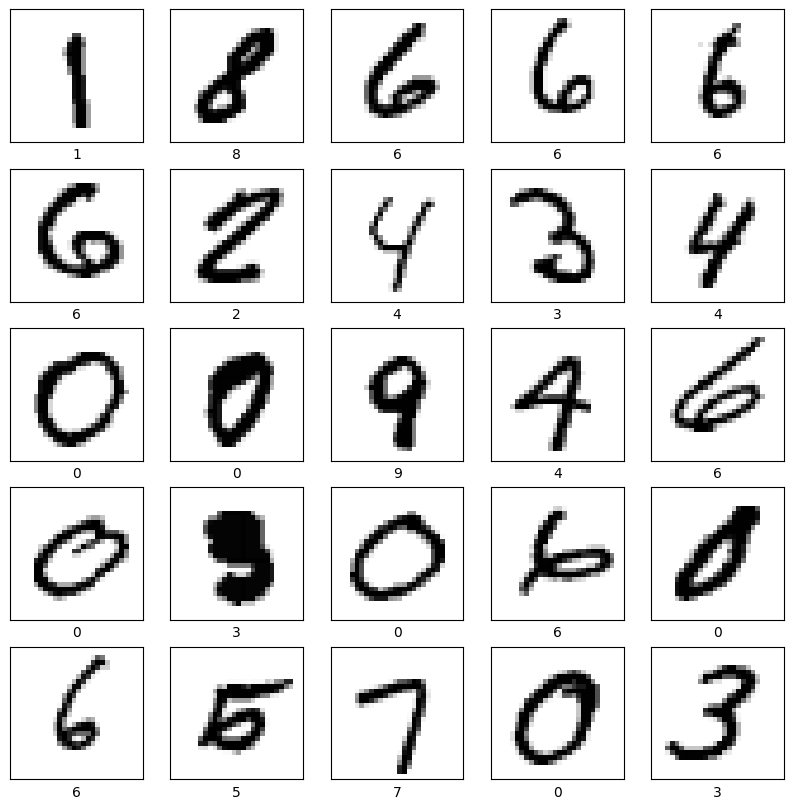

In [7]:
import torch
import torchvision
import matplotlib.pyplot as plt

# 이미지 출력
plt.figure(figsize=(10, 10))
for i, (images, labels) in enumerate(trainloader):
    if i == 1:
        break
    for j in range(25):
        plt.subplot(5, 5, j+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[j][0], cmap=plt.cm.binary)
        plt.xlabel(labels[j].item())
plt.show()

In [8]:
images.shape

torch.Size([64, 1, 28, 28])

In [9]:
# 2. 모델 아키텍처 정의
class LinearClassifier(nn.Module):
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.fc = nn.Linear(784, 10)
        
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = LinearClassifier()
# model = model.cuda()

# 3. 손실 함수 선택
criterion = nn.CrossEntropyLoss()#.cuda()

# 4. 최적화 알고리즘 선택
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# 5. 모델 학습
def train(model, trainloader, criterion, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        # data = data.cuda()
        # target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test(model, testloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            #data = data.cuda()
            #target = target.cuda()
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

epochs = 10
for epoch in range(1, epochs + 1):
    train(model, trainloader, criterion, optimizer)
    test(model, testloader, criterion)

# 6. 모델 평가
test(model, testloader, criterion)



Test set: Average loss: 0.0049, Accuracy: 9112/10000 (91%)


Test set: Average loss: 0.0046, Accuracy: 9152/10000 (92%)


Test set: Average loss: 0.0045, Accuracy: 9185/10000 (92%)


Test set: Average loss: 0.0044, Accuracy: 9209/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9212/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9196/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9231/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9212/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9220/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9225/10000 (92%)


Test set: Average loss: 0.0043, Accuracy: 9225/10000 (92%)



In [11]:
from torch.utils.data import random_split

trainset = datasets.MNIST('./data/', train=True, download=True, transform=transform)
print(len(trainset))

val_size = 5000
train_size = len(trainset) - val_size

train_ds, val_ds = random_split(trainset, [train_size, val_size])

60000


In [12]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=64, shuffle=False)

In [13]:
model = LinearClassifier()
model = model.cuda()

# 3. 손실 함수 선택
criterion = nn.CrossEntropyLoss().cuda()

# 4. 최적화 알고리즘 선택
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

# 5. 모델 학습
def train(model, trainloader, criterion, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(trainloader):
        data = data.cuda()
        target = target.cuda()
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

def test(model, testloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            data = data.cuda()
            target = target.cuda()
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

epochs = 10
for epoch in range(1, epochs + 1):
    train(model, train_loader, criterion, optimizer)
    test(model, val_loader, criterion)

print('Real Test Set !!')
# 6. 모델 평가
test(model, testloader, criterion)


Test set: Average loss: 0.0052, Accuracy: 4534/5000 (91%)


Test set: Average loss: 0.0049, Accuracy: 4563/5000 (91%)


Test set: Average loss: 0.0048, Accuracy: 4579/5000 (92%)


Test set: Average loss: 0.0047, Accuracy: 4589/5000 (92%)


Test set: Average loss: 0.0047, Accuracy: 4580/5000 (92%)


Test set: Average loss: 0.0047, Accuracy: 4584/5000 (92%)


Test set: Average loss: 0.0048, Accuracy: 4596/5000 (92%)


Test set: Average loss: 0.0047, Accuracy: 4596/5000 (92%)


Test set: Average loss: 0.0046, Accuracy: 4590/5000 (92%)


Test set: Average loss: 0.0047, Accuracy: 4593/5000 (92%)

Real Test Set !!

Test set: Average loss: 0.0043, Accuracy: 9219/10000 (92%)



pytorch로 Neural Network코드 짜줘

In [14]:
import torch
import torch.nn as nn

# Neural Network 모델 정의
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MyNeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Hyperparameters 설정
input_size = 784 # MNIST 데이터셋 이미지 크기
hidden_size = 500 # hidden layer의 노드 수
num_classes = 10 # 출력 클래스 수
learning_rate = 0.001

# Neural Network 모델 인스턴스 생성
model = MyNeuralNetwork(input_size, hidden_size, num_classes)
# model = model.cuda()

# Loss function과 Optimizer 정의
criterion = nn.CrossEntropyLoss().cuda()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train 데이터셋과 DataLoader 정의
# train_dataset = # your train dataset here
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                        #    batch_size=100,
                                        #    shuffle=True)

# Neural Network 학습
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        # images = images.cuda()
        # lables = labels.cuda()
        images = images.reshape(-1, 28*28)
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 간단한 Logging
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))


Epoch [1/5], Step [100/860], Loss: 0.3569
Epoch [1/5], Step [200/860], Loss: 0.0489
Epoch [1/5], Step [300/860], Loss: 0.0589
Epoch [1/5], Step [400/860], Loss: 0.1028
Epoch [1/5], Step [500/860], Loss: 0.2138
Epoch [1/5], Step [600/860], Loss: 0.2892
Epoch [1/5], Step [700/860], Loss: 0.1315
Epoch [1/5], Step [800/860], Loss: 0.0895
Epoch [2/5], Step [100/860], Loss: 0.0778
Epoch [2/5], Step [200/860], Loss: 0.0529
Epoch [2/5], Step [300/860], Loss: 0.0185
Epoch [2/5], Step [400/860], Loss: 0.0796
Epoch [2/5], Step [500/860], Loss: 0.1221
Epoch [2/5], Step [600/860], Loss: 0.0421
Epoch [2/5], Step [700/860], Loss: 0.0491
Epoch [2/5], Step [800/860], Loss: 0.0514
Epoch [3/5], Step [100/860], Loss: 0.0317
Epoch [3/5], Step [200/860], Loss: 0.0280
Epoch [3/5], Step [300/860], Loss: 0.1069
Epoch [3/5], Step [400/860], Loss: 0.0494
Epoch [3/5], Step [500/860], Loss: 0.1410
Epoch [3/5], Step [600/860], Loss: 0.1082
Epoch [3/5], Step [700/860], Loss: 0.0916
Epoch [3/5], Step [800/860], Loss:

In [15]:
def test(model, testloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            # data = data.cuda()
            # target = target.cuda()
            data = data.reshape(-1, 28*28)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

In [16]:
test(model, testloader, criterion)


Test set: Average loss: 0.0012, Accuracy: 9766/10000 (98%)



pytorch로  deep neural network 코드 짜줘

In [ ]:
import torch
import torch.nn as nn

# 모델 클래스 정의
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out


pytorch로 convolutional neural network 코드 짜줘

In [17]:
import torch
import torch.nn as nn

# CNN 모델 클래스 정의
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layers
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        # Max pooling layer
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        # Fully connected layers
        self.fc1 = nn.Linear(in_features=32*7*7, out_features=128)
        self.fc2 = nn.Linear(in_features=128, out_features=10)

    def forward(self, x):
        # Convolutional layers
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool(x)
        # Flatten feature maps
        x = torch.flatten(x, start_dim=1)
        # Fully connected layers
        x = self.fc1(x)
        x = nn.functional.relu(x)
        x = self.fc2(x)
        # Output logits
        return x


In [18]:
# Neural Network 모델 인스턴스 생성
conv_model = CNN()
conv_model.cuda()


CNN(
  (conv1): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)

In [19]:
# Loss function과 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(conv_model.parameters(), lr=learning_rate)

In [20]:
# Neural Network 학습
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        images = images.cuda()
        labels = labels.cuda()
        outputs = conv_model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 간단한 Logging
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/5], Step [100/860], Loss: 0.3254
Epoch [1/5], Step [200/860], Loss: 0.2170
Epoch [1/5], Step [300/860], Loss: 0.1287
Epoch [1/5], Step [400/860], Loss: 0.0516
Epoch [1/5], Step [500/860], Loss: 0.1312
Epoch [1/5], Step [600/860], Loss: 0.1085
Epoch [1/5], Step [700/860], Loss: 0.1864
Epoch [1/5], Step [800/860], Loss: 0.1373
Epoch [2/5], Step [100/860], Loss: 0.0595
Epoch [2/5], Step [200/860], Loss: 0.0582
Epoch [2/5], Step [300/860], Loss: 0.0087
Epoch [2/5], Step [400/860], Loss: 0.0314
Epoch [2/5], Step [500/860], Loss: 0.0690
Epoch [2/5], Step [600/860], Loss: 0.0989
Epoch [2/5], Step [700/860], Loss: 0.0472
Epoch [2/5], Step [800/860], Loss: 0.0566
Epoch [3/5], Step [100/860], Loss: 0.0928
Epoch [3/5], Step [200/860], Loss: 0.1264
Epoch [3/5], Step [300/860], Loss: 0.0188
Epoch [3/5], Step [400/860], Loss: 0.0189
Epoch [3/5], Step [500/860], Loss: 0.0454
Epoch [3/5], Step [600/860], Loss: 0.0318
Epoch [3/5], Step [700/860], Loss: 0.1389
Epoch [3/5], Step [800/860], Loss:

In [21]:
def test(model, testloader, criterion):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in testloader:
            data = data.cuda()
            target = target.cuda()
            
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(testloader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(testloader.dataset),
        100. * correct / len(testloader.dataset)))

In [22]:
test(conv_model, testloader, criterion)


Test set: Average loss: 0.0005, Accuracy: 9899/10000 (99%)



In [23]:
import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer6 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer7 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer9 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer10 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        out = self.layer1(x) # B, 1, 28, 28 ->  B, 32, 28, 28 / B, 32, 14, 14
        out = self.layer2(out) # B, 32, 14, 14 -> B, 64, 14, 14 / B, 64, 7, 7
        out = self.layer3(out) # B, 64, 7, 7 -> B, 128, 7, 7 / B, 128, 3, 3
        out = self.layer4(out) # B, 128, 3, 3 -> B, 256, 3, 3 / B, 256, 1, 1
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        out = self.fc(out)
        return out


In [24]:
# Neural Network 모델 인스턴스 생성
conv_model2 = ConvNet()
conv_model2.cuda()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Batc

In [25]:
# Loss function과 Optimizer 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(conv_model2.parameters(), lr=learning_rate)


# Neural Network 학습
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        images = images.cuda()
        labels = labels.cuda()
        outputs = conv_model2(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 간단한 Logging
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

RuntimeError: ignored

In [ ]:
print(images.shape)

torch.Size([64, 1, 28, 28])


In [27]:

import torch.nn as nn

class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer5 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer6 = nn.Sequential(
            nn.Conv2d(512, 1024, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(1024),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer7 = nn.Sequential(
            nn.Conv2d(1024, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer8 = nn.Sequential(
            nn.Conv2d(512, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer9 = nn.Sequential(
            nn.Conv2d(256, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer10 = nn.Sequential(
            nn.Conv2d(128, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Linear(64, 10)

    def forward(self, x):
        out = self.layer1(x) # B, 1, 28, 28 ->  B, 32, 28, 28 / B, 32, 14, 14
        out = self.layer2(out) # B, 32, 14, 14 -> B, 64, 14, 14 / B, 64, 7, 7
        out = self.layer3(out) # B, 64, 7, 7 -> B, 128, 7, 7 / B, 128, 3, 3
        out = self.layer4(out) # B, 128, 3, 3 -> B, 256, 3, 3 / B, 256, 1, 1
        out = self.layer5(out)
        out = self.layer6(out)
        out = self.layer7(out)
        out = self.layer8(out)
        out = self.layer9(out)
        out = self.layer10(out)
        B, C, H, W = out.shape
        out = out.view(B,-1)
        out = self.fc(out)
        return out

In [29]:

# Neural Network 모델 인스턴스 생성
conv_model2 = ConvNet()
conv_model2.cuda()

ConvNet(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer4): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): Batc

In [30]:
train_loader = torch.utils.data.DataLoader(train_ds, batch_size=8, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_ds, batch_size=8, shuffle=False)

# Neural Network 학습
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Forward pass
        B, C, H, W = images.shape
        images.resize_(B,C,1024,1024)
        images = images.cuda()
        labels = labels.cuda()
        outputs = conv_model2(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # 간단한 Logging
        if (i+1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'
                  .format(epoch+1, num_epochs, i+1, len(train_loader), loss.item()))

Epoch [1/5], Step [100/6875], Loss: 2.5476
Epoch [1/5], Step [200/6875], Loss: 2.5867
Epoch [1/5], Step [300/6875], Loss: 2.0986
Epoch [1/5], Step [400/6875], Loss: 2.2166
Epoch [1/5], Step [500/6875], Loss: 2.2327
Epoch [1/5], Step [600/6875], Loss: 2.5933
Epoch [1/5], Step [700/6875], Loss: 2.1157
Epoch [1/5], Step [800/6875], Loss: 2.5549
Epoch [1/5], Step [900/6875], Loss: 2.4522
Epoch [1/5], Step [1000/6875], Loss: 2.6123
Epoch [1/5], Step [1100/6875], Loss: 2.5102
Epoch [1/5], Step [1200/6875], Loss: 2.4987
Epoch [1/5], Step [1300/6875], Loss: 2.0282
Epoch [1/5], Step [1400/6875], Loss: 2.5766
Epoch [1/5], Step [1500/6875], Loss: 2.1717
Epoch [1/5], Step [1600/6875], Loss: 2.4897
Epoch [1/5], Step [1700/6875], Loss: 2.5077
Epoch [1/5], Step [1800/6875], Loss: 2.1371
Epoch [1/5], Step [1900/6875], Loss: 2.3186
Epoch [1/5], Step [2000/6875], Loss: 2.5057
Epoch [1/5], Step [2100/6875], Loss: 2.5799
Epoch [1/5], Step [2200/6875], Loss: 2.5683
Epoch [1/5], Step [2300/6875], Loss: 2.33

KeyboardInterrupt: ignored

### Transfer learning  
특정 태스크를 학습한 모델을 다른 태스크 수행에 재사용하는 기법  
사전학습 된 모델 (pre-trained model) 을 활용하여 나의 task에 맞게 fine-tuning하는 방법    
모델의 low-level layer 은 "일반적인(general)" 특징을 추출하도록 하는 학습이 이루어지는 반면에, 모델의 high-level layer는 특정 데이터셋 또는 특정 문제에서만 나타날 수 있는 "구체적인(specific)" 특징을 추출하도록 학습이 되어짐  
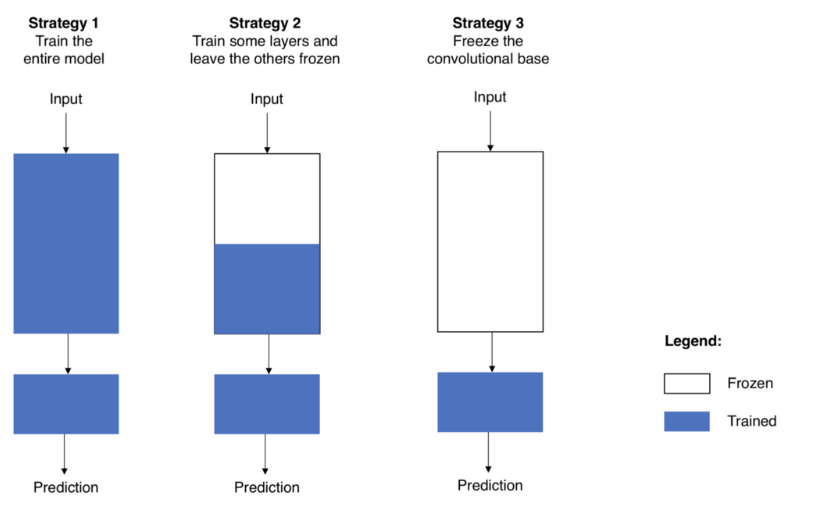  
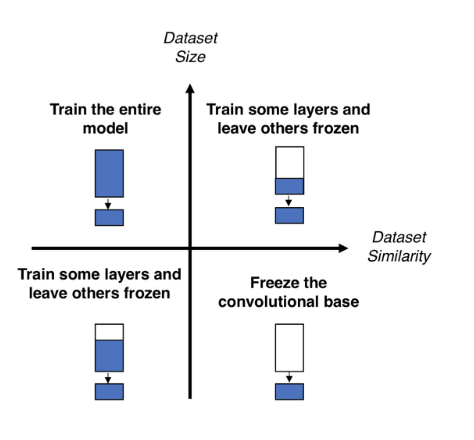


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import copy

transform = transforms.Compose([
        transforms.Resize(224, interpolation=2),
        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

batch_size = 64

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=0)

testset=torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=batch_size,
                                         shuffle=False, num_workers=0)

dataloaders = {'train' : trainloader, 'val' : testloader }
dataset_sizes = { 'train' : len(trainset) , 'val' : len(testset) }

class_names = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')
print(class_names)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #GPU 사용가능 여부확인

Files already downloaded and verified
Files already downloaded and verified
('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


torchvision models   
https://pytorch.org/vision/stable/models.html

### ImageNet dataaset
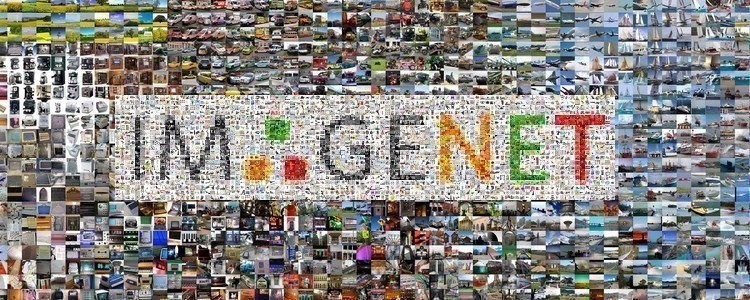

In [2]:
model_ft = models.resnet18(pretrained=True)


/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
model_ft

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [4]:
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, 10).cuda()

model_ft = model_ft.to(device)

In [5]:
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [10]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time() #시작 시간을 기록(총 소요 시간 계산을 위해)

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1)) #epoch를 카운트
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:  #train mode와 validation mode 순으로 진행
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            # dataloader로부터 dataset과 그에 해당되는 label을 불러온다.
            for inputs, labels in dataloaders[phase]:  
                inputs = inputs.to(device) #GPU로 입력데이터를 올림
                labels = labels.to(device) #GPU로 label을 올림
                # zero the parameter gradients
                optimizer.zero_grad()  #Gradient를 0으로 초기화

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs).cuda()
                    _, preds = torch.max(outputs, 1) # 마지막 layer에서 가장 값이 큰 1개의 class를 예측 값으로 지정
                    loss = criterion(outputs, labels).cuda()

                    # backward + optimize only if in training phase
                    if phase == 'train': # training 모드에서는 weight를 update한다.
                        loss.backward()
                        optimizer.step()
                    else:
                        preds=preds.cpu()
                # statistics
                running_loss += loss.item() * inputs.size(0)
                preds = preds.cuda()
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


In [11]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,num_epochs=5)

Epoch 0/4
----------
train Loss: 0.0974 Acc: 0.9696
val Loss: 0.1402 Acc: 0.9506

Epoch 1/4
----------
train Loss: 0.0552 Acc: 0.9843
val Loss: 0.1379 Acc: 0.9540

Epoch 2/4
----------
train Loss: 0.0345 Acc: 0.9926
val Loss: 0.1383 Acc: 0.9534

Epoch 3/4
----------
train Loss: 0.0229 Acc: 0.9960
val Loss: 0.1366 Acc: 0.9553

Epoch 4/4
----------
train Loss: 0.0148 Acc: 0.9983
val Loss: 0.1418 Acc: 0.9530

Training complete in 20m 17s
Best val Acc: 0.955300
